In [37]:
import pandas as pd
import numpy as np
data = pd.read_csv('examdata.csv')
print(data)

        Exam1      Exam2  Pass
0   34.623660  78.024693     0
1   30.286711  43.894998     0
2   35.847409  72.902198     0
3   60.182599  86.308552     1
4   79.032736  75.344376     1
..        ...        ...   ...
95  83.489163  48.380286     1
96  42.261701  87.103851     1
97  99.315009  68.775409     1
98  55.340018  64.931938     1
99  74.775893  89.529813     1

[100 rows x 3 columns]


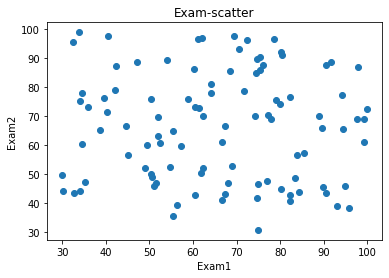

In [29]:
from matplotlib import pyplot as plot

fig1 = plot.figure()
data_exam1 = data.loc[:,'Exam1']
data_exam2 = data.loc[:,'Exam2']
data_plot = plot.scatter(data_exam1,data_exam2)
plot.title('Exam-scatter')
plot.xlabel('Exam1')
plot.ylabel('Exam2')
plot.show()


In [30]:
# 根据是否等于1判断是否通过，并且保存值到mask变量中
mask = data.loc[:,'Pass'] ==1
print(mask)

0     False
1     False
2     False
3      True
4      True
      ...  
95     True
96     True
97     True
98     True
99     True
Name: Pass, Length: 100, dtype: bool


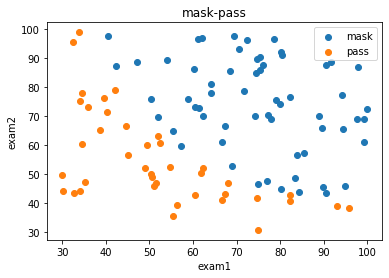

In [34]:
fig2 = plot.figure()
mask_plot = plot.scatter(data_exam1[mask],data_exam2[mask])
pass_plot = plot.scatter(data_exam1[~mask],data_exam2[~mask])
plot.title('mask-pass')
plot.xlabel('exam1')
plot.ylabel('exam2')
plot.legend((mask_plot,pass_plot),('mask','pass'))
plot.show()

In [43]:
x = data.drop(['Pass'],axis=1)
y = data.loc[:,'Pass']
print(x,y)

        Exam1      Exam2
0   34.623660  78.024693
1   30.286711  43.894998
2   35.847409  72.902198
3   60.182599  86.308552
4   79.032736  75.344376
..        ...        ...
95  83.489163  48.380286
96  42.261701  87.103851
97  99.315009  68.775409
98  55.340018  64.931938
99  74.775893  89.529813

[100 rows x 2 columns] 0     0
1     0
2     0
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Name: Pass, Length: 100, dtype: int64
